<a href="https://colab.research.google.com/github/mostafashahin/Speech-Attribute-Detection/blob/main/SpeechAttributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/My\ Drive/PhD/SpeechAttributes/Speech-Attribute-Detection/

/content/gdrive/My Drive/PhD/SpeechAttributes/Speech-Attribute-Detection


In [8]:
!git clone https://github.com/mostafashahin/Speech-Attribute-Detection.git

Cloning into 'Speech-Attribute-Detection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 57 (delta 3), reused 10 (delta 0), pack-reused 39
Unpacking objects: 100% (57/57), done.
Checking out files: 100% (44/44), done.


In [23]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/mostafashahin/Speech-Attribute-Detection
   d27c791..0117d00  main       -> origin/main
Updating d27c791..0117d00
Fast-forward
 phones.txt | 226 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 226 insertions(+)
 create mode 100644 phones.txt


In [3]:
import numpy as np
import gzip
import pandas as pd
from os.path import join

## Data Stats

In [8]:
# Load phones.txt file
sPhonesFile = "phones.txt"
phones = pd.read_csv('phones.txt',sep=' ',names=['PhoneSymb','PhoneIndx'])

In [9]:
def getPhone(sPhonPosition):
  return sPhonPosition.split('_')[0]

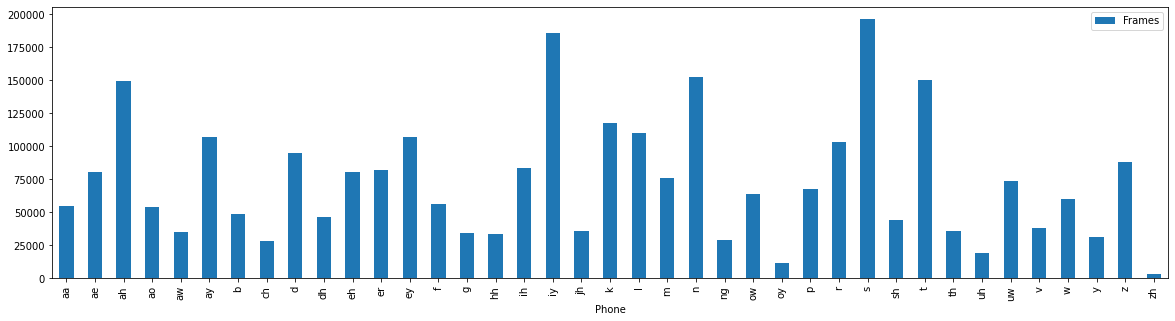

In [30]:
# OGI Data
sDataFile='ogi.ctm.gz'
dfCTM = pd.read_csv(join('ali_data',sDataFile),sep=' ',names=['fileID','Channel','StartTime','Duration','PhoneIndx'],compression='gzip')
dfPhone = dfCTM.groupby(by=['PhoneIndx'],as_index=False).sum()[['Duration','PhoneIndx']]
dfPhone = dfPhone.merge(phones,how='left',on='PhoneIndx')
#Exclude sil
dfPhone.drop(dfPhone.index[dfPhone['PhoneSymb'].str.contains('sil|unk|hes|laughs')],inplace=True)
#Add Column for phoneme symbole without position
dfPhone['Phone'] = np.vectorize(getPhone)(dfPhone['PhoneSymb'])
#Add N# Frames Column
dfPhone['Frames'] = dfPhone['Duration']*100
dfPhone_NoPos = dfPhone.groupby(by='Phone',as_index=False).sum()
dfPhone_NoPos.plot.bar(x='Phone',y='Frames',figsize=(20,5))

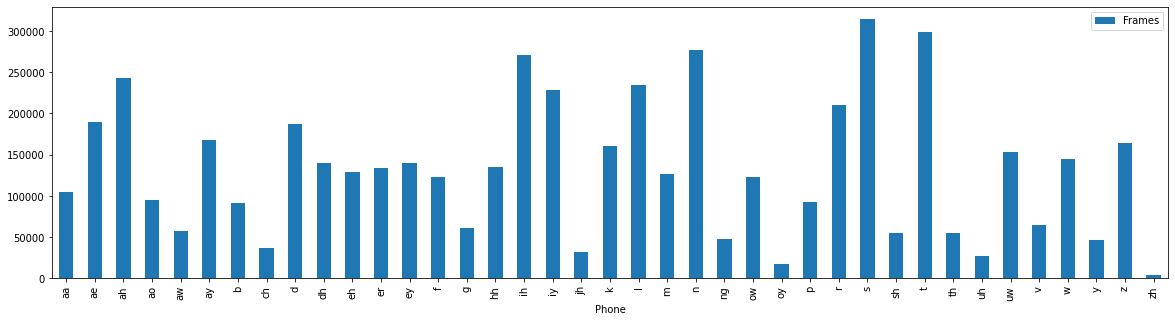

In [31]:
# cu Data
sDataFile='cu.ctm.gz'
dfCTM = pd.read_csv(join('ali_data',sDataFile),sep=' ',names=['fileID','Channel','StartTime','Duration','PhoneIndx'],compression='gzip')
dfPhone = dfCTM.groupby(by=['PhoneIndx'],as_index=False).sum()[['Duration','PhoneIndx']]
dfPhone = dfPhone.merge(phones,how='left',on='PhoneIndx')
#Exclude sil
dfPhone.drop(dfPhone.index[dfPhone['PhoneSymb'].str.contains('sil|unk|hes|laughs')],inplace=True)
#Add Column for phoneme symbole without position
dfPhone['Phone'] = np.vectorize(getPhone)(dfPhone['PhoneSymb'])
#Add N# Frames Column
dfPhone['Frames'] = dfPhone['Duration']*100
dfPhone_NoPos = dfPhone.groupby(by='Phone',as_index=False).sum()
dfPhone_NoPos.plot.bar(x='Phone',y='Frames',figsize=(20,5))

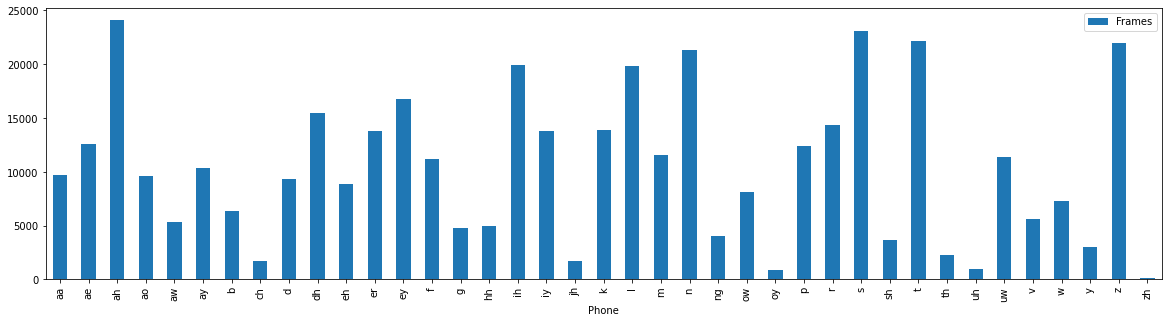

In [32]:
# cmu Data
sDataFile='cmu.ctm.gz'
dfCTM = pd.read_csv(join('ali_data',sDataFile),sep=' ',names=['fileID','Channel','StartTime','Duration','PhoneIndx'],compression='gzip')
dfPhone = dfCTM.groupby(by=['PhoneIndx'],as_index=False).sum()[['Duration','PhoneIndx']]
dfPhone = dfPhone.merge(phones,how='left',on='PhoneIndx')
#Exclude sil
dfPhone.drop(dfPhone.index[dfPhone['PhoneSymb'].str.contains('sil|unk|hes|laughs')],inplace=True)
#Add Column for phoneme symbole without position
dfPhone['Phone'] = np.vectorize(getPhone)(dfPhone['PhoneSymb'])
#Add N# Frames Column
dfPhone['Frames'] = dfPhone['Duration']*100
dfPhone_NoPos = dfPhone.groupby(by='Phone',as_index=False).sum()
dfPhone_NoPos.plot.bar(x='Phone',y='Frames',figsize=(20,5))

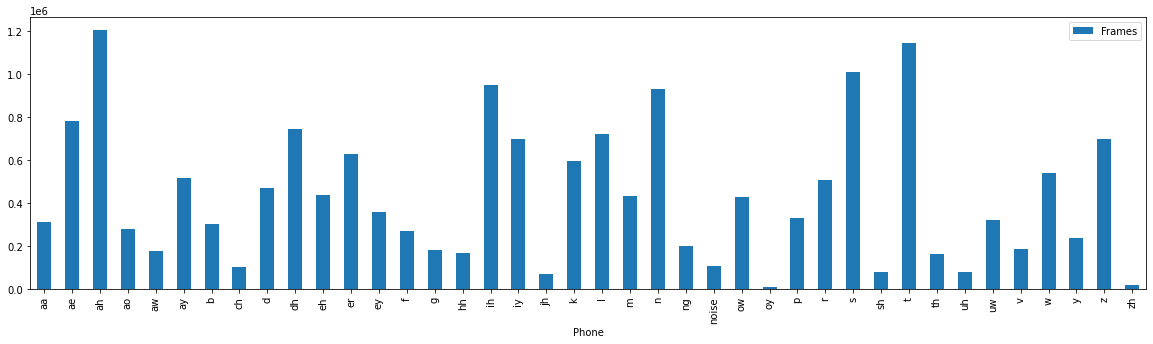

In [33]:
# myst Data
sDataFile='myst.ctm.gz'
dfCTM = pd.read_csv(join('ali_data',sDataFile),sep=' ',names=['fileID','Channel','StartTime','Duration','PhoneIndx'],compression='gzip')
dfPhone = dfCTM.groupby(by=['PhoneIndx'],as_index=False).sum()[['Duration','PhoneIndx']]
dfPhone = dfPhone.merge(phones,how='left',on='PhoneIndx')
#Exclude sil
dfPhone.drop(dfPhone.index[dfPhone['PhoneSymb'].str.contains('sil|unk|hes|laughs')],inplace=True)
#Add Column for phoneme symbole without position
dfPhone['Phone'] = np.vectorize(getPhone)(dfPhone['PhoneSymb'])
#Add N# Frames Column
dfPhone['Frames'] = dfPhone['Duration']*100
dfPhone_NoPos = dfPhone.groupby(by='Phone',as_index=False).sum()
dfPhone_NoPos.plot.bar(x='Phone',y='Frames',figsize=(20,5))

ValueError: ignored

In [28]:
dfPhone.index[dfPhone['PhoneSymb'].str.contains('sil|unk')]

Int64Index([1, 3, 4], dtype='int64')

In [29]:
dfPhone.iloc[[1,3,4]]

,Duration,PhoneIndx,PhoneSymb
1,1194.22,15,unk_S
3,2027.96,26,sil
4,336.89,30,sil_S
